In [1]:
run = "2023-01-29_01-14-47"
results_file = f"../logs/eval/runs/{run}/results.csv"

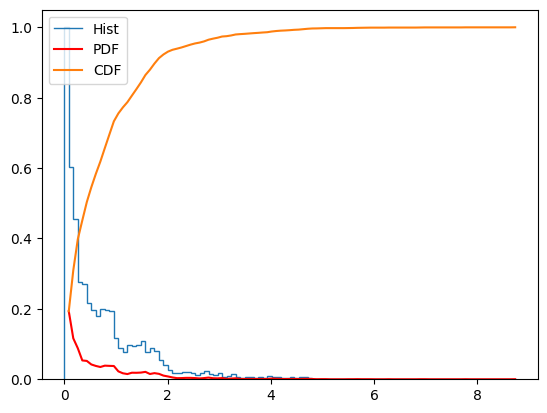

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

  
# reading losses from results
df = pd.read_csv(results_file)
losses = df['LOSS'].to_numpy()
  
# getting data of the histogram
count, bins_count = np.histogram(losses, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.stairs(count / np.max(count), bins_count, label='Hist')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

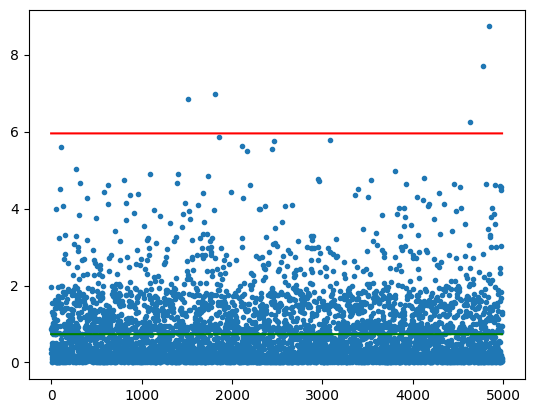

In [7]:
import matplotlib.pyplot as plt

std = np.std(losses)
mean = np.mean(losses)

t = mean + 6 * std


plt.scatter(range(len(losses)), losses, marker='.')
plt.plot(range(len(losses)), np.full((len(losses)), t), color='red')
plt.plot(range(len(losses)), np.full((len(losses)), mean), color='green')
plt.show()

In [8]:
for i, sample in df.iterrows():
    if sample['LOSS'] >= t:
        print(sample['DS_INDEX'], sample['MESSAGE'], sample['LOSS'])

1516 cd043d37-25d9-4c1c-b87f-22f71e0767e7.log.msg 6.851500034332275
1814 fc3efb35-4f64-4eb0-9f79-45daefeb3d41.log.msg 6.977491855621338
4627 405e577d-7336-459b-8848-d519431c2b60.log.msg 6.23837423324585
4772 cf3ee34d-8227-40cf-80d5-8cbed098afd3.log.msg 7.701231956481934
4843 2286ac72-fa67-43d4-9817-ab7b2d1f8552.log.msg 8.730086326599121
